In [37]:
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier



# Chargement des fichiers CSV
benin_data = pd.read_csv("../data/dataBell_DNS Dataset/features_domain_benign_csv.csv")
malware_data = pd.read_csv("../data/Bell_DNS Dataset/features-domain_Malware.csv")
phishing_data = pd.read_csv("../data/Bell_DNS Dataset/features-domain_phishing.csv")
spam_data = pd.read_csv("../data/dataBell_DNS Dataset/features-domain_Spam.csv")

# Ajout de la colonne 'Class' 
benin_data['Class'] = 'Benin'
malware_data['Class'] = 'Malware'
phishing_data['Class'] = 'Phishing'
spam_data['Class'] = 'Spam'


# Concaténation de tous les ensembles de données
all_data = pd.concat([benin_data, malware_data, phishing_data, spam_data], ignore_index=True)



In [38]:
# Spécifier la colonne cible je doit le faire avant l'encodage
y = all_data['Class']

In [39]:
# Séparer les caractéristiques numériques et catégorielles
X_numerical = all_data.select_dtypes(include='number')
X_categorical = all_data.select_dtypes(exclude='number')

In [ ]:
############### Pa Necessaire  ##################
############## ne pas executer cette section ###########

# Convertir les variables catégorielles en variables numériques

#all_data_encoded = pd.get_dummies(all_data, columns=['Class'], drop_first=True)


In [14]:
############### Pa Necessaire  ##################
############## ne pas executer cette section ###########


# Séparer les caractéristiques numériques et catégorielles
#X_numerical = all_data_encoded.select_dtypes(include='number')
#X_categorical = all_data_encoded.select_dtypes(exclude='number')

In [40]:
# Imputation des valeurs manquantes pour les caractéristiques numériques
numerical_imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(X_numerical), columns=X_numerical.columns)

In [41]:
# Copier les colonnes originales avant l'encodage
original_categorical_columns = X_categorical.columns.tolist()

In [42]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder


# Convertir les colonnes catégorielles en chaînes de caractères (parceque actuellement sa contient les int et les str il faut normaliser en str)
X_categorical = X_categorical.astype(str)

# Utiliser l'encodage ordinal pour transformer les données catégorielles en valeurs numériques
ordinal_encoder = OrdinalEncoder()
X_categorical_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_categorical), columns=X_categorical.columns)

# Réduire la dimension avec OneHotEncoder
# Supprimer les colonnes avec une variance en dessous d'un certain seuil
selector = VarianceThreshold(threshold=0.01)
X_categorical_reduced = selector.fit_transform(X_categorical_encoded)

# Mettez à jour la sélection des colonnes originales
original_categorical_columns = X_categorical.columns[selector.get_support()]

# Créer un DataFrame avec les colonnes originales
X_categorical_reduced_df = pd.DataFrame(X_categorical_reduced, columns=original_categorical_columns)

# Concaténer les caractéristiques numériques et catégorielles
X_combined = pd.concat([X_numerical_imputed, X_categorical_reduced_df], axis=1)

In [43]:
#on se rassure que tout est bien convertis pour eviter l'erreur plus bas

X_combined.columns = X_combined.columns.astype(str)


In [44]:
#La Class ne doit pas faire partir des features important car c'est la cible

# Imprimer les noms des colonnes pour déboguer
print(X_combined.columns)

# Supprimer les colonnes de classe s'il y en a
# class_columns_to_drop = ['Class_1', 'Class_2', 'Class_3']

class_columns_to_drop = ['Class']

existing_class_columns = set(class_columns_to_drop).intersection(X_combined.columns)

if existing_class_columns:
    X_combined = X_combined.drop(existing_class_columns, axis=1)

# Imprimer à nouveau les noms des colonnes pour vérifier
print(X_combined.columns)


Index(['subdomain', 'len', 'numeric_percentage', 'entropy', 'dec_8', 'dec_32',
       'oc_8', 'oc_32', 'hex_8', 'hex_32', 'puny_coded', 'Alexa_Rank',
       'Page_Rank', 'tld', 'sld', 'char_distribution', '1gram', '2gram',
       '3gram', 'longest_word', 'distance_from_bad_words', 'typos',
       'shortened', 'Domain_Name', 'Registrar', 'Registrant_Name',
       'Creation_Date_Time', 'Emails', 'Domain_Age', 'Organization', 'State',
       'Country', 'Name_Server_Count', 'Class'],
      dtype='object')
Index(['subdomain', 'len', 'numeric_percentage', 'entropy', 'dec_8', 'dec_32',
       'oc_8', 'oc_32', 'hex_8', 'hex_32', 'puny_coded', 'Alexa_Rank',
       'Page_Rank', 'tld', 'sld', 'char_distribution', '1gram', '2gram',
       '3gram', 'longest_word', 'distance_from_bad_words', 'typos',
       'shortened', 'Domain_Name', 'Registrar', 'Registrant_Name',
       'Creation_Date_Time', 'Emails', 'Domain_Age', 'Organization', 'State',
       'Country', 'Name_Server_Count'],
      dtype='obje

In [45]:
from sklearn.model_selection import StratifiedKFold #Pour effectuer une validation croisée stratifiée.
from sklearn.feature_selection import RFECV #La classe qui effectue la sélection de caractéristiques

# Modèle pour la sélection de fonctionnalités
estimator = DecisionTreeClassifier()

# Créer une instance de RFECV
rfe_cv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(10), verbose=1, n_jobs=-1)

# Ajuster RFECV sur les données
rfe_cv.fit(X_combined, y)

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), n_jobs=-1, verbose=1)

In [ ]:
############## Ne pas executer ceci ###########

# Créer une instance de RFECV avec un nombre fixe de caractéristiques à sélectionner (20 dans cet exemple)
num_features_to_select = 20
rfe_cv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=StratifiedKFold(10), verbose=1, n_jobs=-1, min_features_to_select=num_features_to_select)


# Créer une instance de RFECV avec un nombre fixe de caractéristiques à sélectionner (15 dans cet exemple)
num_features_to_select = 15
rfe_cv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=StratifiedKFold(10), verbose=1, n_jobs=-1, n_features_to_select=num_features_to_select)


In [46]:
# Afficher les caractéristiques sélectionnées
selected_features = list(X_combined.columns[rfe_cv.support_])
print("Caractéristiques importantes (RFECV):")
print(selected_features)


Caractéristiques importantes (RFECV):
['subdomain', 'entropy', 'Alexa_Rank', 'char_distribution', '2gram', 'shortened']


In [49]:
# Obtenir les indices des colonnes sélectionnées selector est un objet de type VarianceTreshold()

selected_columns_indices = selector.get_support(indices=True)

# Obtenir les noms des colonnes sélectionnées
selected_columns_names = X_combined.columns[selected_columns_indices]

# Afficher les caractéristiques sélectionnées avec leurs noms
selected_features_with_names = list(zip(selected_columns_indices, selected_columns_names))
print("Caractéristiques importantes (RFECV):")
print(selected_features_with_names)

Caractéristiques importantes (RFECV):
[(0, 'subdomain'), (1, 'len'), (2, 'numeric_percentage'), (3, 'entropy'), (4, 'dec_8'), (5, 'dec_32'), (6, 'oc_8'), (7, 'oc_32'), (8, 'hex_8'), (10, 'puny_coded'), (11, 'Alexa_Rank'), (12, 'Page_Rank'), (13, 'tld'), (14, 'sld'), (15, 'char_distribution'), (16, '1gram'), (17, '2gram'), (18, '3gram'), (19, 'longest_word'), (20, 'distance_from_bad_words'), (21, 'typos')]


In [50]:
# Afficher les caractéristiques sélectionnées avec leurs noms et types
selected_features_with_names_and_types = []

for index, name in selected_features_with_names:
    # Obtenir le type de la caractéristique
    feature_type = "Categorical" if name in original_categorical_columns else "Numerical"
    
    # Ajouter à la liste
    selected_features_with_names_and_types.append((name, feature_type))

print("Caractéristiques importantes (RFECV):")
for name, feature_type in selected_features_with_names_and_types:
    print(f"{name}: {feature_type}")

Caractéristiques importantes (RFECV):
subdomain: Numerical
len: Numerical
numeric_percentage: Numerical
entropy: Numerical
dec_8: Numerical
dec_32: Numerical
oc_8: Numerical
oc_32: Numerical
hex_8: Numerical
puny_coded: Numerical
Alexa_Rank: Numerical
Page_Rank: Numerical
tld: Categorical
sld: Categorical
char_distribution: Categorical
1gram: Categorical
2gram: Categorical
3gram: Categorical
longest_word: Categorical
distance_from_bad_words: Categorical
typos: Categorical


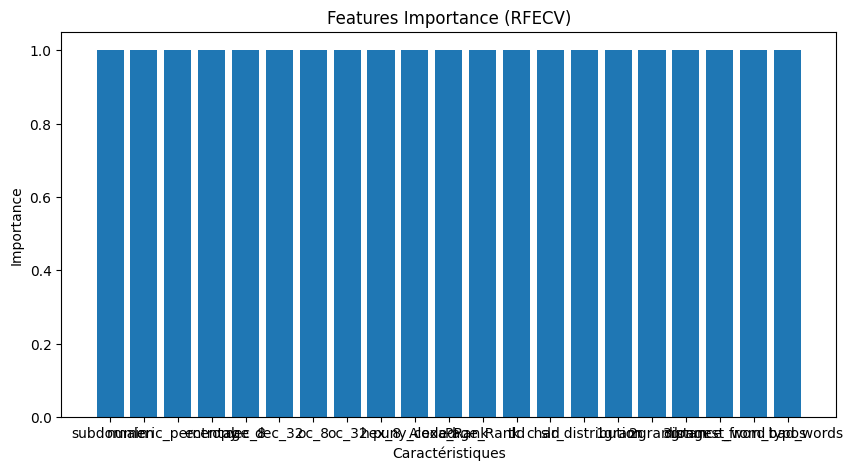

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Affichage des résultats
plt.figure(figsize=(10, 5))
plt.bar(selected_columns_names, np.ones(len(selected_columns_names)))
plt.title("Features Importance (RFECV)")
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.show()